plotting self energy as a fucntion of E-Ec/2t0 .
so basically we have 1D lead modelled by a semi-inifinite wire described by a one-band effective mass Hamiltonian. first point of the wire is labeled as "0" it is the channel part and the rest of the wire labeled n , n<0 as the contact. 

 self energy ofcourse will be having real and imaginary parts from the well know cosine dispersion relation E = Ec + 2t_0(1 - cos ka) we will get Sigma as the function of E from the self energy of a one D LEAD as Sigma(E) = -t_0 exp(ika)

we see got sigma(E)/t0 = (x-1) - iSQRT(2x-x^Sq) where x = (E-Ec) / 2t_0 .  The sign of the radical has been chosen so that the imaginary part of is negative. For
values of x where the quantity under the radical sign is negative (this corresponds to energy values outside the allowed band) we should choose the sign such that goes to zero for large values of x:

 Sigma(E)/t0 = (x −1)+ sqrt( x2 −2x), −∞≤x≤0 
 Sigma(E)/t0 = (x −1)−  sqrt(x2 −2x), 2≤x≤+∞ 


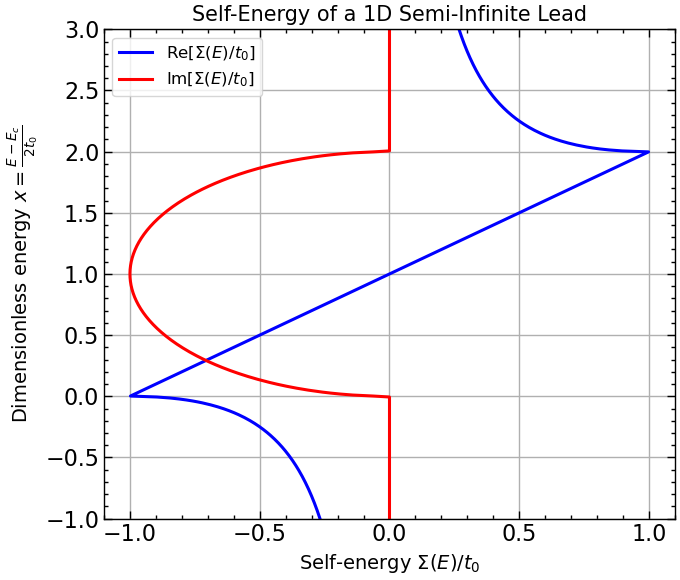

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science' , 'notebook'])

# === x range: dimensionless energy ===
x = np.linspace(-1, 3, 500)

# Initialize self-energy components
Sigma_real = np.zeros_like(x)
Sigma_imag = np.zeros_like(x)

# Region 1: outside band — real only 
mask_real = (x <= 0) 
Sigma_real[mask_real] = x[mask_real] - 1 + np.sqrt(x[mask_real]**2 - 2 * x[mask_real])
Sigma_imag[mask_real] = 0

# Region 3: outside band — real only
mask_real = (x >= 2) 
Sigma_real[mask_real] = x[mask_real] - 1 - np.sqrt(x[mask_real]**2 - 2 * x[mask_real])
Sigma_imag[mask_real] = 0


# Region 2: inside band — imaginary part appears
mask_imag = (x > 0) & (x < 2)
Sigma_real[mask_imag] = x[mask_imag] - 1
Sigma_imag[mask_imag] = -np.sqrt(2 * x[mask_imag] - x[mask_imag]**2)

# === Plotting ===
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(Sigma_real, x, label=r"Re[$\Sigma(E)/t_0$]", color='blue', linewidth=2.2)
ax.plot(Sigma_imag, x, label=r"Im[$\Sigma(E)/t_0$]", color='r', linewidth=2.2)

# Axis labels
ax.set_xlabel(r"Self-energy $\Sigma(E)/t_0$", fontsize=14)
ax.set_ylabel(r"Dimensionless energy $x = \frac{E - E_c}{2t_0}$", fontsize=14)
ax.set_title("Self-Energy of a 1D Semi-Infinite Lead", fontsize=15)

# Axis limits
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 3)

# Legend and grid
ax.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white')
ax.grid(True)

plt.tight_layout()
plt.show()
